#Regressão Linear

#Método estatístico que permite estudar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou preditoras). 
#O objetivo da Regressão Linear é encontrar uma equação linear que descreva o melhor possível essa relação, ou seja, que minimize a diferença entre os valores observados e os valores estimados pela equação.

In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd #Biblioteca para Manipulação e análise de dados.
import seaborn as sns #Biblioteca para Criação de gráficos estatísticos de alta qualidade.
import matplotlib.pyplot as plt #Biblioteca básica para visualização de dados no Python.

In [3]:
wines = pd.read_csv("C:\\Users\\Dell\\Desktop\\IntroducaoML\\datasets\\winequality-white.csv")

In [4]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#Mapa de Calor

<Axes: >

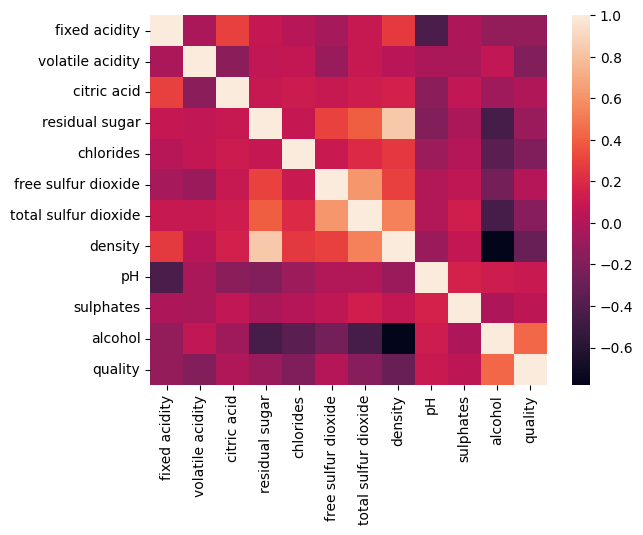

In [6]:
sns.heatmap(wines.corr())

#Visualização em tabela dos mesmos dados do Mapa de Calor

In [7]:
wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [8]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_columns = ['quality']

In [10]:
x = wines[x_columns]
y = wines[y_columns]

In [11]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [13]:
from sklearn.model_selection import train_test_split

#Separando conjuntos de treino e teste

#x: Conjunto de características (features) do dataset.

#y: Conjunto de rótulos ou valores alvo correspondentes às características em x.

#test_size=0.3: Especifica que 30% dos dados serão alocados para o conjunto de teste, enquanto os 70% restantes serão utilizados para treinamento.

#random_state=3: Define uma semente para o gerador de números aleatórios, garantindo que a divisão dos dados seja reproduzível em execuções subsequentes.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3993,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0
4406,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8
1905,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9
2622,6.6,0.26,0.21,2.9,0.026,48.0,126.0,0.99089,3.22,0.38,11.3
3041,6.2,0.33,0.41,16.8,0.037,58.0,173.0,0.99882,3.25,0.57,9.4


In [16]:
y_train.head()

,quality
3993,7
4406,7
1905,6
2622,7
3041,6


#Classe  utilizada para criar e ajustar modelos de regressão linear, que são amplamente usados para prever valores contínuos

In [17]:
from sklearn.linear_model import LinearRegression

#cria uma instância da classe LinearRegression

In [18]:
lr = LinearRegression()

#Ajusta o modelo de regressão linear (instância lr do LinearRegression) aos dados de treinamento, ou seja, ele "treina" o modelo usando os conjuntos de entrada (x_train) e saída (y_train).

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

#Após treinar o modelo com o método fit, o atributo lr.coef_ retorna os coeficientes (ou pesos) aprendidos pelo modelo de regressão linear para cada variável independente (feature).

In [20]:
lr.coef_

array([[ 9.46658323e-02, -1.82543795e+00,  3.07827695e-03,
         1.04348518e-01, -2.77044766e-01,  4.17726945e-03,
         8.34206574e-05, -2.23683929e+02,  7.91866647e-01,
         7.40460470e-01,  1.05663168e-01]])

#A variável "predição" recebe os resultados da previsão feita pelo modelo treinado anteriormente

In [21]:
predicao = lr.predict(x_test)

In [22]:
predicao

array([[5.95318578],
       [6.15820669],
       [5.89609505],
       ...,
       [5.39849296],
       [5.64762769],
       [5.52980317]], shape=(1470, 1))

In [23]:
y_test

,quality
4576,5
167,7
1889,5
958,7
3010,5
...,...
4528,6
556,5
586,6
2836,6


Text(0, 0.5, 'Valores Preditos')

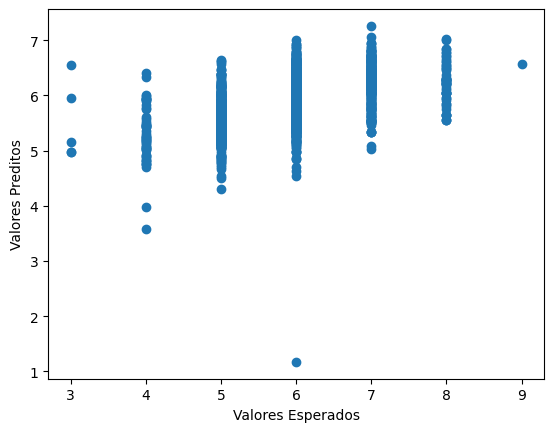

In [27]:
plt.scatter(y_test, predicao)
plt.xlabel("Valores Esperados")
plt.ylabel("Valores Preditos")

#Mean Squared Error (MSE) é uma métrica usada para avaliar a precisão de um modelo de regressão.

#Quanto menor o MSE, melhor o modelo, já que significa que as previsões do modelo estão mais próximas dos valores reais.
#Se o MSE for alto, isso indica que o modelo está fazendo previsões significativamente diferentes dos valores reais.

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
print(mean_squared_error(y_test, predicao))

0.5866032190096563
